In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

2022-03-19 01:20:56.657276: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-19 01:20:56.657300: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
from tensorflow.keras.utils import to_categorical

y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

In [5]:
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [7]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# convert 28 * 28 to a single array of 784
model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

# output layer
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

2022-03-19 01:21:05.163930: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-19 01:21:05.163959: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-19 01:21:05.163982: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ali): /proc/driver/nvidia/version does not exist
2022-03-19 01:21:05.164231: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [9]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/10


2022-03-19 01:21:14.323517: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1870/1875 [============================>.] - ETA: 0s - loss: 0.1353 - accuracy: 0.9588

2022-03-19 01:21:29.475786: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 17s 9ms/step - loss: 0.1351 - accuracy: 0.9589 - val_loss: 0.0580 - val_accuracy: 0.9821
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0391 - val_accuracy: 0.9868
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0473 - val_accuracy: 0.9850


In [10]:
metrics = pd.DataFrame(model.history.history)

In [11]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.135127,0.958900,0.058041,0.9821
1,0.046596,0.985500,0.039093,0.9868
2,0.030763,0.990433,0.047340,0.9850


<AxesSubplot:>

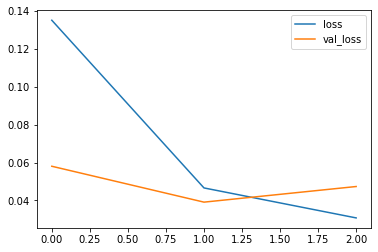

In [12]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

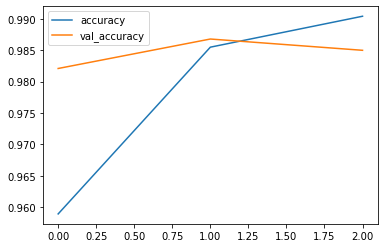

In [13]:
metrics[['accuracy', 'val_accuracy']].plot()

In [14]:
model.metrics_names

['loss', 'accuracy']

In [15]:
model.evaluate(X_test, y_cat_test, verbose=0)

2022-03-19 01:24:25.564778: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


[0.047340165823698044, 0.9850000143051147]

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
predictions = model.predict(X_test)

2022-03-19 01:25:50.415313: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


In [22]:
predictions.argmax(axis=-1)

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
predictions = predictions.argmax(axis=-1)

In [24]:
predictions.shape

(10000,)

In [25]:
y_test.shape

(10000,)

In [26]:
y_cat_test.shape

(10000, 10)

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       1.00      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



In [28]:
confusion_matrix(y_test, predictions)

array([[ 974,    0,    2,    0,    0,    0,    1,    1,    2,    0],
       [   0, 1130,    2,    1,    0,    0,    2,    0,    0,    0],
       [   2,    1, 1024,    1,    0,    0,    2,    1,    1,    0],
       [   0,    0,    2, 1002,    0,    1,    0,    2,    3,    0],
       [   0,    0,    0,    0,  979,    0,    1,    0,    0,    2],
       [   1,    0,    0,   12,    0,  873,    3,    1,    2,    0],
       [   4,    2,    0,    0,    1,    1,  949,    0,    1,    0],
       [   1,    1,   12,    1,    1,    0,    0, 1011,    1,    0],
       [   5,    1,    7,    1,    1,    2,    3,    4,  948,    2],
       [   4,    2,    3,    5,   18,    1,    0,   12,    4,  960]])

<AxesSubplot:>

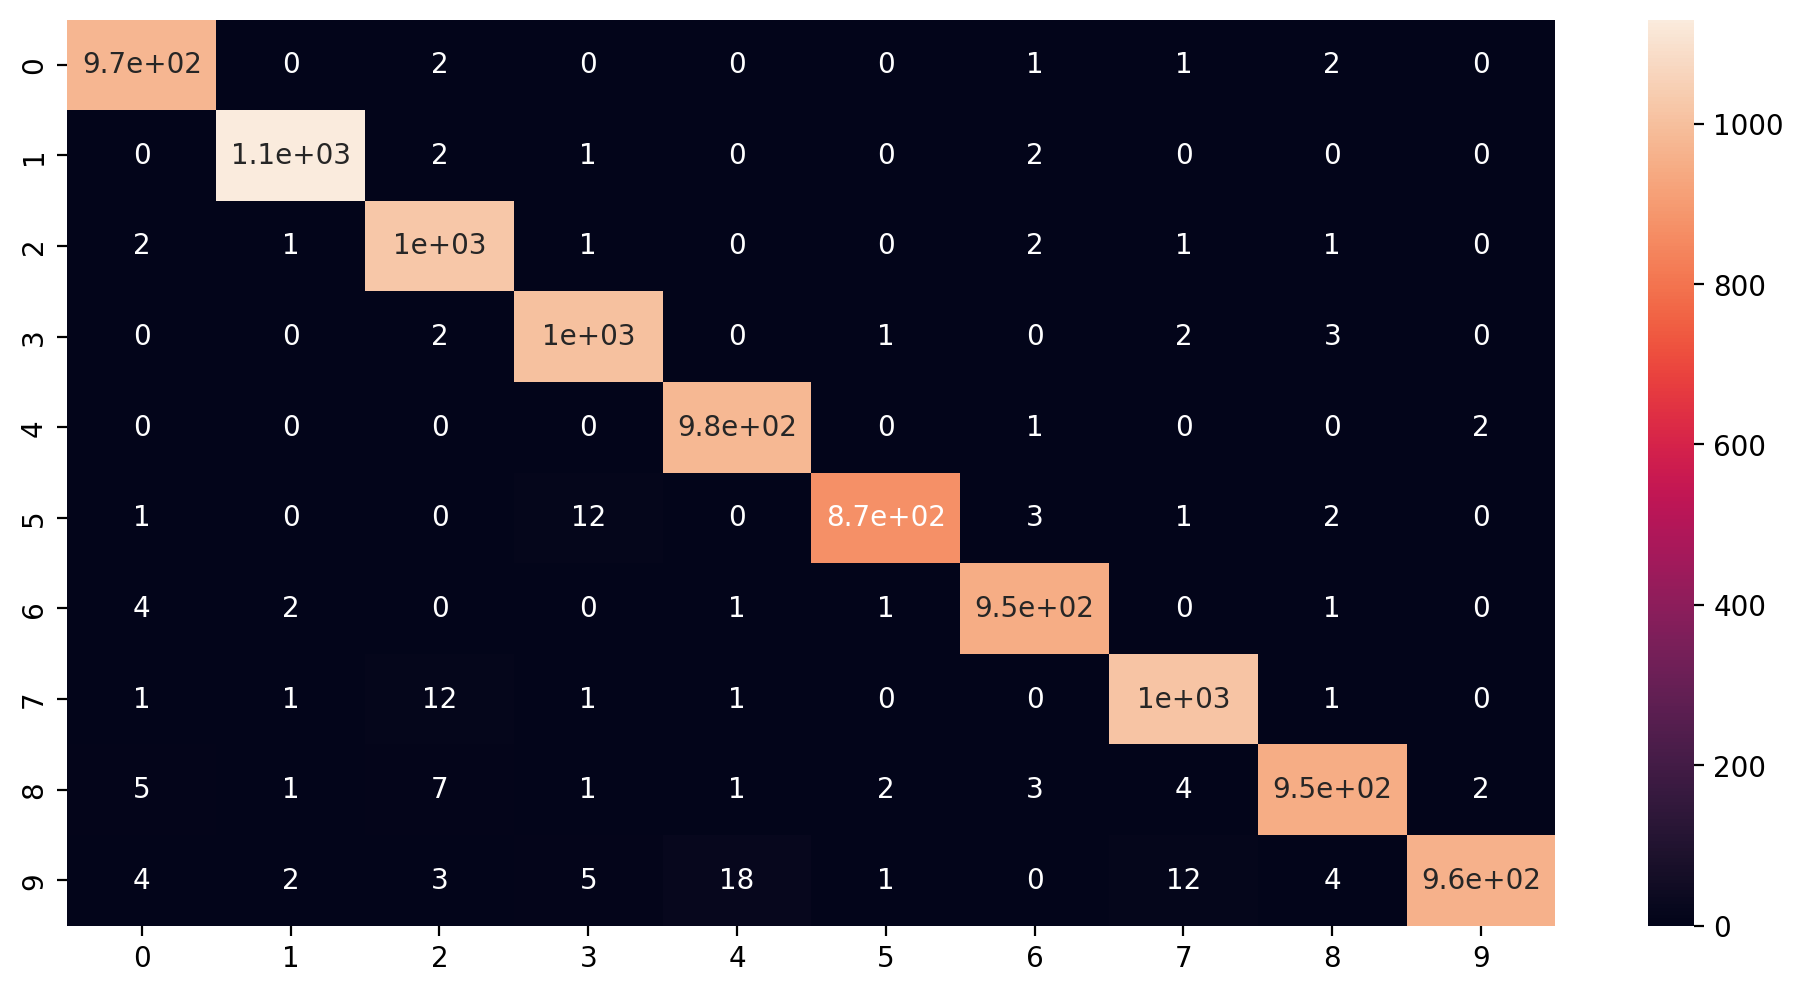

In [31]:
plt.figure(figsize=(12, 6), dpi=200)
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [32]:
my_number = X_test[0]

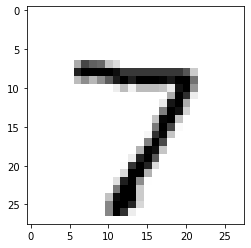

In [33]:
plt.imshow(my_number, cmap='binary')

In [35]:
model.predict(my_number.reshape(1, 28, 28, 1)).argmax(axis=-1)

array([7])